# Qubit's density matrix reconstruction by maximum likelihood method

We start with generating some sample measurement data at given basis.

For a given qubit's state $\rho$ we "perform" a projection on two state orthogonal states 
$$|\psi\rangle=\cos (\theta/2) |0\rangle + \sin (\theta/2) e^{i\phi} |1\rangle,$$ and $$|\psi'\rangle = \sin (\theta/2) |0\rangle -  \cos (\theta/2)e^{-i\phi} |1\rangle,$$ that gives probabilities
$$p_0 = \text{Tr}( | \Psi\rangle \langle \Psi |\rho),$$
$$p_1 = \text{Tr}( | \Psi'\rangle \langle \Psi' |\rho).$$
The sets of probabilities $\{p_0,p_1,...\}$ and corresponding projectors $\{| \Psi\rangle \langle \Psi |,| \Psi'\rangle \langle \Psi' |\}$ are used in maxlink reconstruction algorithm

In [7]:
import numpy as np

def probability(rho,proj):
    # Calculate a probability of getting an eigenvalue of given projection proj in a measurement
    
    return np.trace(np.dot(proj, rho))


rho = np.array([[1,1.j],[-1.j,1]])/2


Theta = np.linspace(0,np.pi,4)
Phi = np.linspace(0,np.pi,4)

# Generate set of probability

N=np.size(Theta)*np.size(Phi)
proj = np.zeros((2*N,2,2),np.csingle)
prob = np.zeros(2*N,np.csingle)

i=0
for theta in Theta:
    for phi in Phi:
        
        eStat=[np.cos(theta/2),np.sin(theta/2)*np.exp(1.j*phi)]
        eStatOrt=[np.sin(theta/2),-np.cos(theta/2)*np.exp(-1.j*phi)]
        
        proj0=np.outer(np.conj(eStat),eStat)
        proj1=np.outer(np.conj(eStatOrt),eStatOrt)
        
        proj[i] = proj0
        proj[i+1] = proj1

        prob[i]=probability(rho=rho,proj=proj0)
        prob[i+1]=probability(rho=rho,proj=proj1)
        
        i+=2
        

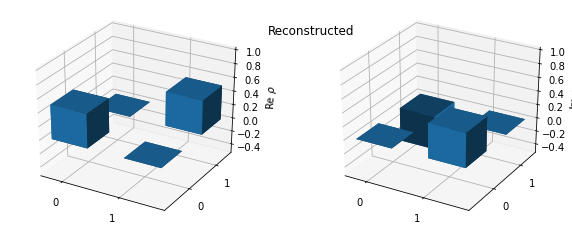

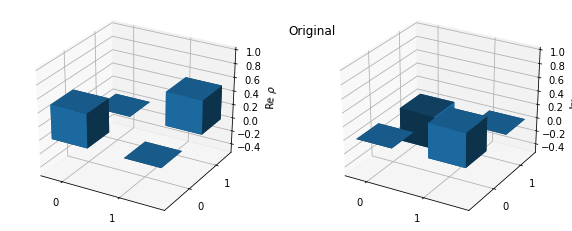

In [8]:
import mLink
import barPlot


# seed density matrix
rhoTest = np.array([[0.8,0],[0,0.2]])

# Reconstructed density matrix
rhoML=mLink.maxlink(rho=rhoTest,proj=proj,F=prob,N=20)

# Visualize reconstructed and original density matrices
barPlot.plotDM(rho=rhoML,folderName='Images',name='Reconstructed',labels=['0','1'],title='Reconstructed')
barPlot.plotDM(rho=rho,folderName='Images',name='Original',labels=['0','1'],title='Original')